<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Support Vector Machine (SVM) - (Mobile Prices Dataset)</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4>
</div>

<img src = "https://miro.medium.com/max/375/0*9jEWNXTAao7phK-5.png" width=25%>

## What is SVM?

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well 

<img src = "https://miro.medium.com/max/375/0*0o8xIA4k3gXUDCFU.png" width=25%>

Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).


<img src = "https://miro.medium.com/max/1773/1*ZpkLQf2FNfzfH4HXeMw4MQ.png" width=50%>


* Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

<img src = "SVM1.jpg" width=80%>

<img src = "SVM2.jpg" width=80%>

## About Dataset - Mobile Price Classification

* Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be.

* Mr Tehranipour wants to start his own mobile phone company and he wants to wage an uphill battle with big smartphone brands like Samsung and Apple. But he doesn’t know how to estimate the price of a mobile that can cover both marketing and manufacturing costs. So in this task, you don’t have to predict the actual prices of the mobiles but you have to predict the price range of the mobiles. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

since our task is to classify the price range of mobile phones and not to predict the actual prices, so here I am going to train a classification model to classify the price range of mobile phones as:

    0 (low cost)
    1 (medium cost)
    2 (high cost)
    3 (very high cost)

In [2]:
data = pd.read_csv('mobile_prices.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# More on Dataset

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [4]:
data.shape

(2000, 21)

In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Correlation ')

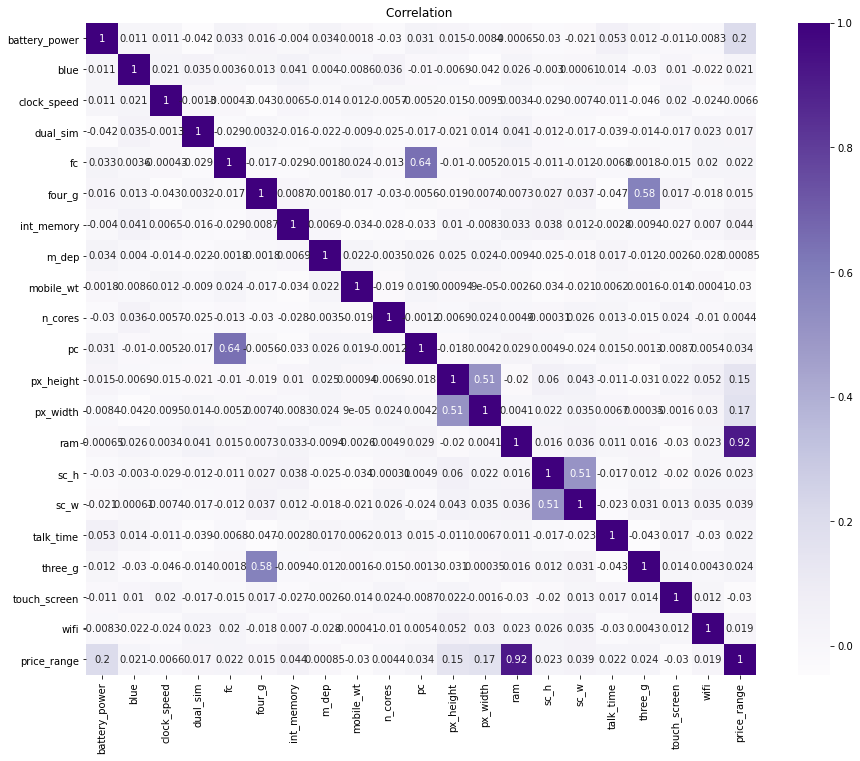

In [27]:
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples' , annot=True)
r.set_title("Correlation ")

In [9]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [10]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Data PreProcessing 

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [13]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [14]:
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

## Training and Test 

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [15]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)
(400, 20)
(400,)


In [17]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = svclassifier.predict(X_test)

In [19]:
y_pred

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 1, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 0, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 3, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2,
       0, 2, 2, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [20]:
y_test

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [21]:
X_test[0]

array([ 1.18705122, -0.9900495 , -0.14985287,  0.98117712,  0.15908825,
       -1.04396559,  1.70625635,  1.03435682, -0.37436279,  1.52124939,
        1.49823547,  1.66090168,  0.3042979 , -0.06566673,  1.58907778,
        1.43112714,  0.91330319, -1.78686097,  0.99401789, -1.01409939])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  96.0


In [24]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3
row_0,,,,
0,101,2,0,0
1,4,86,2,0
2,0,4,95,2
3,0,0,2,102


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[101   2   0   0]
 [  4  86   2   0]
 [  0   4  95   2]
 [  0   0   2 102]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.93      0.93      0.93        92
           2       0.96      0.94      0.95       101
           3       0.98      0.98      0.98       104

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

